# Klasyfikacja tweetów Elona Muska

### Projekt realizuje grupa:

*  Wiktor Bajor **249459**
*  Adam Kubiak **249480**


### Opis wykonywanego zadania: 

&nbsp; W ramach projektu grupa będzie realizować zadanie klasyfikacji binarnej tweetów Elona Muska. Wykonywane zadanie będzie opierać się o zebranie tweetów sławnych ludzi, takich jak politycy, przedsiębiorcy, sportowcy, celebryci, influencerzy oraz Elon Musk. 
Akwizycja danych będzie realizowana poprzez publiczny interfejs programowania aplikacji (API), udostępniony przez Twitter.  Przy czym możliwa ilość tweetów do pobrania to pięćset tysięcy, co powinno być wystarczającą ilością danych. Dzięki udostępnionemu API można uzyskać dostęp do takich danych jak, treść publikacji, godzina publikacji, lokalizacja, ilość polubień czy ilość retweetów. Po ukończeniu etapu akwizycji danych kolejnym zadaniem, będzie przeanalizowanie tweetów, mając na uwadze takie elementy jak ilość retweetów, ilość polubień, występowanie pewnych słów kluczowych czy też sentyment umieszczonego tekstu. Na podstawie dokonanej analizy zostaną wybrane najbardziej charakterystyczne cechy tweetów Elona Muska. Ostatnim elementem projektu będzie utworzenie i wytrenowanie (na bazie wcześniej wybranych najbardziej istotny cech) klasyfikatora, który będzie oceniał czy dany tweet był napisany przez Elona Muska czy też nie. Wykonana analiza oraz klasyfikator mogłyby zostać wykorzystane do stworzenia cyfrowego sobowtóra Elona Muska. 

In [40]:
import tweepy
import configparser
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

In [1]:
#read configs
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

NameError: name 'configparser' is not defined

In [19]:

def clean_tweet(tweet):
    return re.sub(r"http\S+", "", tweet)

def get_tweet_sentiment(tweet):  
        analysis = TextBlob(clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [20]:
auth = tweepy.OAuth1UserHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [29]:
userID = "elonmusk"

tweets = api.user_timeline(screen_name=userID, 
                           count=200,
                           include_rts = False,
                           tweet_mode = 'extended',
                           exclude_replies = True
                           )

for info in tweets[:3]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

ID: 1585050236120027137
2022-10-25 23:26:39+00:00
Works on any moving land object https://t.co/Xu4qKJW4D9


ID: 1584764977457397760
2022-10-25 04:33:08+00:00
What lesson took you the longest to unlearn?


ID: 1584717774261489665
2022-10-25 01:25:34+00:00
διαλεκτική




In [30]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended',
                           exclude_replies = True
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 46
N of tweets downloaded till now 79
N of tweets downloaded till now 117
N of tweets downloaded till now 162
N of tweets downloaded till now 200
N of tweets downloaded till now 240
N of tweets downloaded till now 261
N of tweets downloaded till now 288
N of tweets downloaded till now 320
N of tweets downloaded till now 353
N of tweets downloaded till now 378
N of tweets downloaded till now 410
N of tweets downloaded till now 446
N of tweets downloaded till now 461
N of tweets downloaded till now 482
N of tweets downloaded till now 499


In [36]:
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              clean_tweet(tweet.full_text),
              get_tweet_sentiment(tweet.full_text)] 
             for idx,tweet in enumerate(all_tweets)]
df = pd.DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text","sentiment"])
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(200)

,id,created_at,favorite_count,retweet_count,text,sentiment
0,1585050236120027137,2022-10-25 23:26:39+00:00,26442,2411,Works on any moving land object,neutral
1,1584764977457397760,2022-10-25 04:33:08+00:00,137159,10800,What lesson took you the longest to unlearn?,neutral
2,1584717774261489665,2022-10-25 01:25:34+00:00,91267,6521,διαλεκτική,neutral
3,1584174386998697985,2022-10-23 13:26:21+00:00,108134,11976,Think about who might have decided “The Curren...,neutral
4,1584173256415723521,2022-10-23 13:21:51+00:00,112664,8903,Who decides “The Current Thing?”\nReal questio...,positive
...,...,...,...,...,...,...
195,1547793837443035136,2022-07-15 04:03:02+00:00,634297,48080,,neutral
196,1547743421581864963,2022-07-15 00:42:42+00:00,50585,3974,Dragon launching in 2 mins,neutral
197,1547238325907513346,2022-07-13 15:15:37+00:00,498448,54903,A+ for cinematography,neutral
198,1547093032301985794,2022-07-13 05:38:17+00:00,114264,6890,Starship launch site tonight,neutral


In [1]:
df.head(500)

NameError: name 'df' is not defined

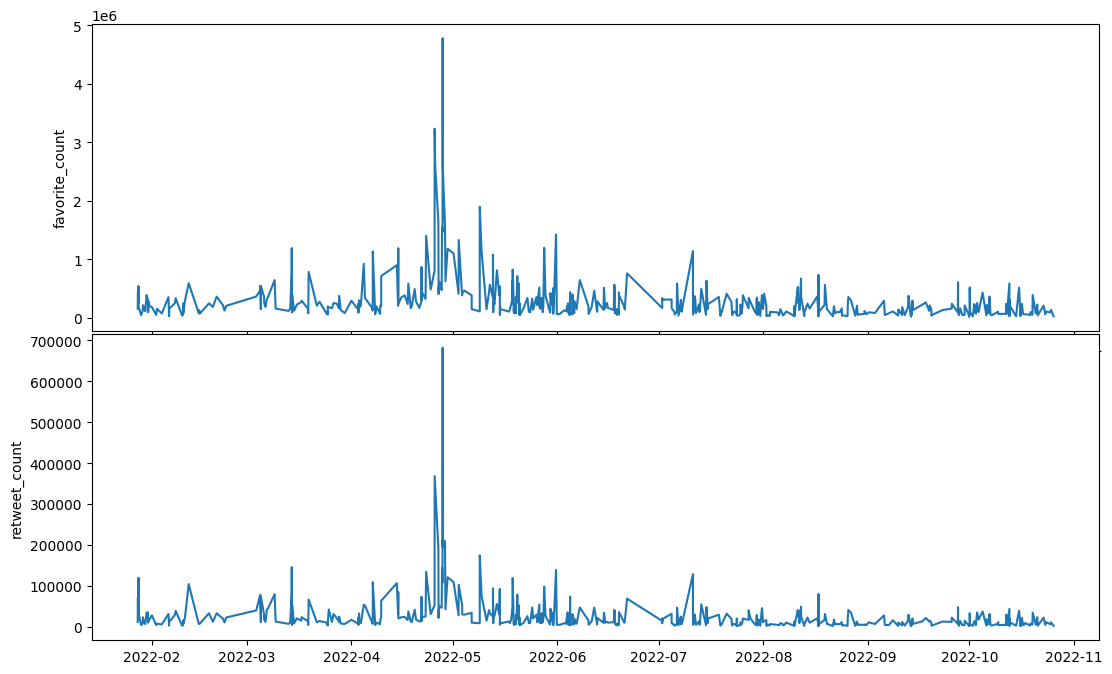

In [43]:
ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(13,8))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df["created_at"],df[ylabel])
    ax.set_ylabel(ylabel)
plt.show()